<a href="https://colab.research.google.com/github/SiracencoSerghei/linear_algebra/blob/main/2.8_projection_orthogon/2.8_2_proj_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import math

---
# Projections in R^N
---

Key Concepts:
Solving Ax = b: The goal is to find the vector
𝑥 that satisfies the equation
𝐴
𝑥
=
𝑏.

Explicit Inverse: The method using np.linalg.inv involves calculating the inverse of the matrix, which can be less efficient and numerically unstable, especially for large matrices.

Efficient Method: Using np.linalg.solve is more stable as it directly solves the equation without explicitly calculating the inverse.

In this code, both methods should yield the same solution for
𝑥, which is why the results are compared and printed to ensure they match.:

In [6]:
## the goal here is to solve Ax = b for x

# sizes
m = 16  # Number of rows in matrix A (and length of vector b)
n = 10  # Number of columns in matrix A

# vector b
b = np.random.randn(m, 1)
# Generate a random vector b with m rows and 1 column (a column vector)

# matrix A
A = np.random.randn(m, n)
# Generate a random matrix A with m rows and n columns

# solution using explicit inverse
x1 = np.linalg.inv(A.T @ A) @ (A.T @ b)
# Compute the solution x using the explicit inverse method:
# 1. Compute the transpose of A: A.T
# 2. Compute the product of A.T and A: A.T @ A
# 3. Compute the inverse of A.T @ A: np.linalg.inv(A.T @ A)
# 4. Compute the product of A.T and b: A.T @ b
# 5. Multiply the inverse of A.T @ A with A.T @ b to get the solution x1

# python solution (better method)
x2 = np.linalg.solve(A.T @ A, A.T @ b)
# Compute the solution x using a more stable and efficient method:
# 1. Compute the product of A.T and A: A.T @ A
# 2. Use np.linalg.solve to solve the linear equation (A.T @ A)x = A.T @ b directly
#    This avoids explicitly computing the inverse, which is numerically more stable

# show that the results are the same
print(np.round(x1.T, 3))
# Print the transpose of the solution vector x1, rounded to 3 decimal places

print(np.round(x2.T, 3))
# Print the transpose of the solution vector x2, rounded to 3 decimal places


[[-0.188 -0.088  0.098 -0.133 -0.018 -0.246 -0.519 -0.318 -0.093  0.013]]
[[-0.188 -0.088  0.098 -0.133 -0.018 -0.246 -0.519 -0.318 -0.093  0.013]]


Geometric Perspective in 𝑅3:

This code is dealing with vectors and matrices in a 3-dimensional space, where the vector 𝑏 is in 𝑅3. The matrix 𝐴 is mapping from 𝑅2 to 𝑅3.
Least Squares Solution:  The vector 𝑥 is the solution to the least squares problem, where we want to find the vector 𝑥 such that 𝐴⋅𝑥 is as close as possible to 𝑏.  This is done by solving the normal equation (𝐴𝑇𝐴)⋅𝑥 = 𝐴𝑇⋅𝑏, which gives us the vector 𝑥 that minimizes the distance between 𝐴⋅𝑥 and 𝑏.
Projection: The product 𝐴⋅𝑥 (denoted as 𝐴𝑥) is the projection of 𝑏 onto the column space of 𝐴. This means 𝐴𝑥 is the closest point in the column space of 𝐴 to the vector 𝑏.

Output:

The code prints the original vector 𝑏 and the projected vector 𝐴𝑥, showing how the vector 𝑏 looks before and after the projection.
This code gives a geometric interpretation of solving a linear system in
𝑅3, particularly focusing on the projection of a vector 𝑏 onto the column space of a matrix 𝐴.

In [7]:
## geometric perspective in R^3

# matrix sizes
m = 3  # Number of rows in matrix A (dimension of vector b, represents R^3)
n = 2  # Number of columns in matrix A (number of variables)

# vector b
b = np.random.randn(m, 1)
# Generate a random vector b with m rows and 1 column (a column vector in R^3)

# matrix A
A = np.random.randn(m, n)
# Generate a random matrix A with m rows and n columns
# This represents a linear transformation from R^2 to R^3

# solution
x = np.linalg.solve(A.T @ A, A.T @ b)
# Solve the normal equations to find the vector x that minimizes the difference between Ax and b:
# 1. Compute the product of the transpose of A and A: A.T @ A
# 2. Compute the product of the transpose of A and b: A.T @ b
# 3. Solve (A.T @ A)x = A.T @ b for x using np.linalg.solve

Ax = A @ x
# Compute the product of A and the solution vector x
# This gives us the projection of b onto the column space of A in R^3

print(b.T)
# Print the transpose of the vector b, so it's displayed as a row vector

print(Ax.T)
# Print the transpose of the vector Ax, so it's displayed as a row vector

[[ 1.08446192 -0.48353778  2.19925279]]
[[ 0.95011436 -1.39899849  1.33647148]]


Plotting in 3D: This code creates a 3D plot where vectors and planes are visualized in 𝑅3.

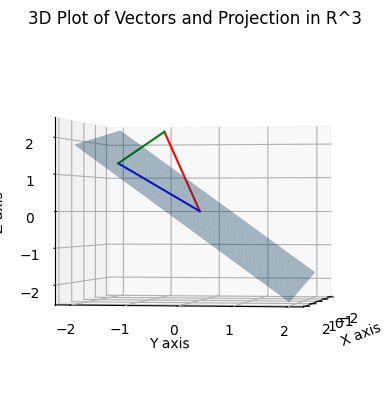

In [19]:
## plot
fig = plt.figure(figsize=plt.figaspect(1))
# Create a new figure for the plot with an aspect ratio of 1, making the plot square
ax = fig.add_subplot(projection='3d')
# Add a 3D subplot to the figure for plotting in three dimensions

b = np.squeeze(b)
Ax = np.squeeze(Ax)
# Remove any extra dimensions from b and Ax (flatten them if they're 2D arrays with a single column)
# This step ensures that b and Ax are 1D arrays with three elements, corresponding to their components in R^3

# plot the vectors
ax.plot([0, b[0]], [0, b[1]], [0, b[2]], 'r')
# Plot the vector b in red, starting from the origin [0, 0, 0] and ending at the coordinates [b[0], b[1], b[2]]
ax.plot([0, Ax[0]], [0, Ax[1]], [0, Ax[2]], 'b')
# Plot the vector Ax (the projection of b onto the column space of A) in blue, starting from the origin and ending at [Ax[0], Ax[1], Ax[2]]

# plot the projection line
ax.plot([Ax[0], b[0]],
        [Ax[1], b[1]],
        [Ax[2], b[2]], 'g')
# Plot the projection line connecting the tip of Ax to the tip of b in green
# This line shows the "error" or the difference between the original vector b and its projection Ax

# now draw plane
xx, yy = np.meshgrid(np.linspace(-2, 2), np.linspace(-2, 2))
# Create a meshgrid for plotting the plane spanned by the columns of matrix A
# xx and yy are grids of points that cover the range from -2 to 2

cp = np.cross(A[:,0], A[:,1])
# Compute the cross product of the two columns of A (A[:,0] and A[:,1])
# The cross product gives a vector that's perpendicular to the plane spanned by these two vectors

z1 = (-cp[0]*xx - cp[1]*yy) * 1./cp[2]
# Calculate the corresponding z-coordinates (z1) for each point on the grid, ensuring the plane passes through the origin
# This equation comes from the plane equation: cp[0]*x + cp[1]*y + cp[2]*z = 0, rearranged to solve for z

ax.plot_surface(xx, yy, z1, alpha=.4)
# Plot the plane in 3D space with some transparency (alpha = 0.4) to visualize the relationship between the plane and the vectors

# Set labels for the axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Set the title of the plot
ax.set_title('3D Plot of Vectors and Projection in R^3')

# Adjust the view angle for better visualization
ax.view_init(elev=0, azim=10)

plt.show()
# Display the plot

